In [1]:
import numpy as np
import matplotlib.pyplot as  plt
from matplotlib.ticker import MultipleLocator 
from scipy import stats
from numpy import cumsum

def normal_sim(p):

    """
    Requires a simulation profile, p, structures as a dictionary

    p = {
        'inc0'     : 80000           #average starting income 
        'g'        : 0.025           #rowth rate  
        'rho'      : 0.4             #positive deopendence 
        't'        : [2020, 2059]    #year t (t >= 2020)
        'num_draws': 10000           #simulations
        'mean'       : 0             #mean
        'sd'    : 0.13.              #standard deviation
    
    
    } 

    """
    #set random seed
    np.random.seed(524)
    normal_errors = np.random.normal(p['mean'], p['sd'], (p['t'], p['num_draws']))
    #create a matrix of dim ((t - 2019), num_draws)
    ln_inc_mat = np.zeros((p['t'] - 2019, p['num_draws']))

    #fill in the first row
    ln_inc_mat [0, :] = np.log(p['inc0']) + normal_errors[0, :]

    #loop and apply model
    for yr in range(1, p['t'] - 2019):
         ln_inc_mat[yr, :] =(1 - p['rho']) * (np.log(p['inc0']) + p['g'] * yr)\
             + p['rho'] * ln_inc_mat[ yr - 1, :] + normal_errors[yr, :]
    income_mat = np.exp(ln_inc_mat)

    return income_mat
   
 

In [2]:
sim_profile = {'inc0': 80000, 
               'g': 0.025, 
               'rho': 0.4, 
               't': 2059, 
               'num_draws': 10000,
               'mean': 0,
               'sd': 0.13
              }

income_mat = normal_sim(sim_profile)
income_mat

array([[ 66409.15585396,  98274.13534194, 101939.81109509, ...,
         98720.39690442,  72404.51636886,  68710.32820307],
       [ 80020.53020329,  67383.19350738,  84557.85626308, ...,
         68247.7770509 ,  74518.33613244,  80555.96068584],
       [ 75805.26636606,  66134.42494243,  91458.20304692, ...,
         67268.53350159,  90012.42673528,  80645.62355527],
       ...,
       [272690.56519108, 217821.73027242, 184724.24512469, ...,
        159922.45424852, 253961.68337673, 209741.55004062],
       [231539.17420799, 202509.15149494, 197955.96626493, ...,
        199502.43481758, 210951.71828579, 205420.27946389],
       [197895.95201384, 165115.10025278, 172644.86927513, ...,
        248654.44847819, 234237.14656466, 221566.29879732]])

Text(0,0.5,'Annual income (\\$s)')

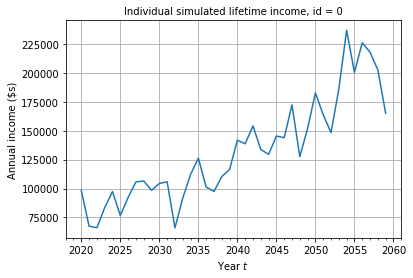

In [3]:
# %matplotlib inline
p = sim_profile
year_vec = np.arange(2020, p['t']+1)
individual = 1
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income, id = 0', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

Text(0.5,1,'MACSS Income distribution in year 2020')

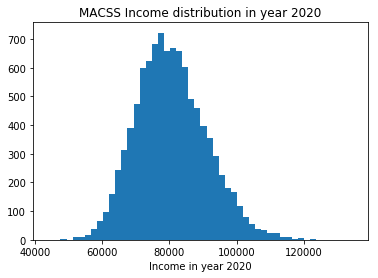

In [4]:
plt.hist(income_mat[0, :], bins=50)
plt.xlabel("Income in year 2020")
plt.title("MACSS Income distribution in year 2020")

In [5]:
h = (income_mat[0, :] > 100000).sum()
h/10000

0.0417

In [6]:
l = (income_mat[0, :] < 70000).sum()
l/10000

0.1512

From the above calculation, we can see that 4.17% of my class will earn more than \$100000 in the first year out of the program and 15.12% will earn less than $70000. From the graph above, the distribution is bell curved and normally distributed with a mean of 80000.

In [7]:
a = np.zeros((40, 10000))
for i in range(10000):
    a[:, i] =  0.1 * cumsum(income_mat[:, i])

b = np.zeros((10000, 1))
for i in range(10000): 
    b[i, 0] = np.sum(a[:, i] < 95000) + 1 

Text(0.5,1,'MACSS student debt pay-off time')

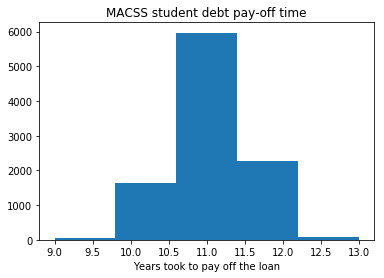

In [8]:
plt.hist(b, bins = 5)
plt.xlabel("Years took to pay off the loan")
plt.title("MACSS student debt pay-off time")

In [9]:
num = (b <= 10).sum()
num/10000

0.1678

In 16.78% of the simulations, I can pay off the debt in ten years.

In [10]:
sim_profile2 = {'inc0': 90000, 
               'g': 0.025, 
               'rho': 0.4, 
               't': 2059, 
               'num_draws': 10000,
               'mean': 0,
               'sd': 0.17
              }

income_mat2 = normal_sim(sim_profile2)
income_mat2

array([[ 70550.46142451, 117783.33011091, 123561.20729139, ...,
        118483.24080508,  78992.81966812,  73764.25171169],
       [ 89615.63768821,  71575.56495871,  96317.75493523, ...,
         72778.88084775,  81644.3347736 ,  90400.57899801],
       [ 82955.30101689,  69396.06916251, 106035.55593099, ...,
         70956.3661129 , 103848.93176006,  89949.09077038],
       ...,
       [338309.11761165, 252187.52025149, 203293.03644369, ...,
        168361.21927259, 308250.29858492, 240024.49205936],
       [271061.07048342, 227502.32436192, 220836.5697397 , ...,
        223095.32811759, 239983.96514044, 231788.44418303],
       [219057.46748997, 172865.33333479, 183245.71710131, ...,
        295275.8618388 , 273090.00167035, 253934.86273481]])

In [11]:
a2 = np.zeros((40, 10000))
for i in range(10000):
    a2[:, i] =  0.1 * cumsum(income_mat2[:, i])

b2 = np.zeros((10000, 1))
for i in range(10000): 
    b2[i, 0] = np.sum(a2[:, i] < 95000) + 1  
stats.describe(b2)

DescribeResult(nobs=10000, minmax=(array([7.]), array([13.])), mean=array([9.9733]), variance=array([0.62884999]), skewness=array([-0.02951266]), kurtosis=array([0.01395818]))

Text(0.5,1,'MACSS student debt pay-off time (new)')

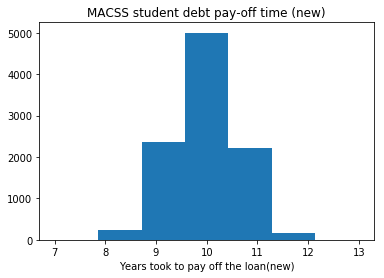

In [12]:
plt.hist(b2, bins = 7)
plt.xlabel("Years took to pay off the loan(new)")
plt.title("MACSS student debt pay-off time (new)")

In [13]:
num2 = (b2 <= 10).sum()
num2/10000

0.7602

In the new simulation, in 76.02% of the simulations, I can pay off the debt in ten years.